**Assignment-02**

**Name: Nusrat Jahan Akhi**

**ID: 1901040**

**PART (A)**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

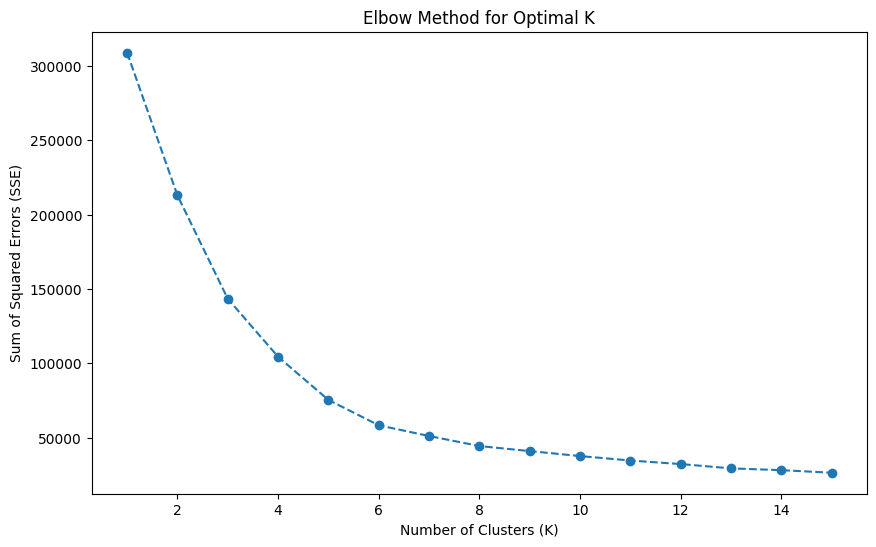

     CustomerID  Cluster
0             1        0
1             2        4
2             3        0
3             4        4
4             5        0
..          ...      ...
195         196        1
196         197        3
197         198        1
198         199        3
199         200        1

[200 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select the relevant features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Find the appropriate number of clusters (K) using the Elbow Method
sse = []

for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is the SSE for that model

# Plot the SSE values for different K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Based on the Elbow Method plot, it looks like K=5 is a reasonable choice for the number of clusters

# Perform K-means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

# Display the resulting cluster assignments
print(data[['CustomerID', 'Cluster']])


**PART (B)**

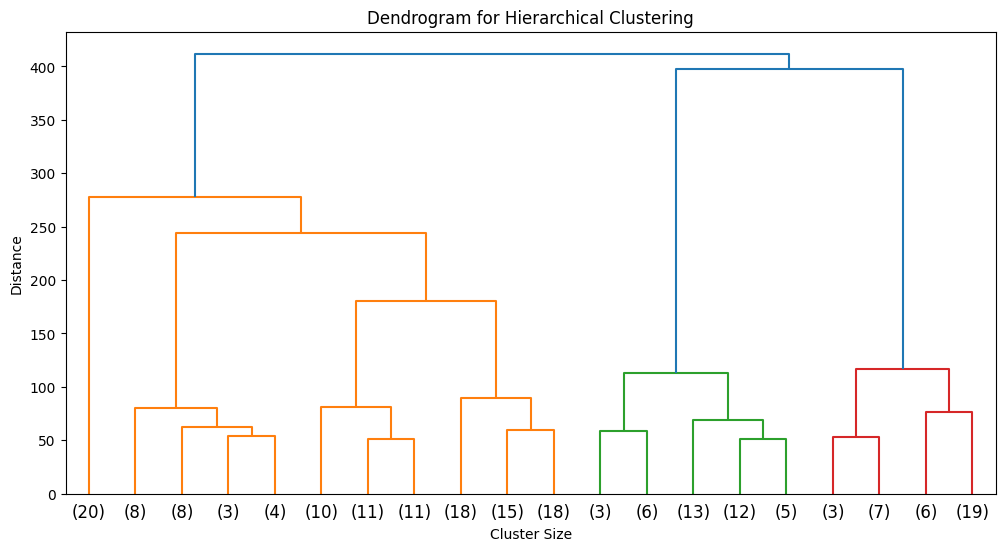

     CustomerID  Cluster
0             1        4
1             2        3
2             3        4
3             4        3
4             5        4
..          ...      ...
195         196        2
196         197        1
197         198        2
198         199        1
199         200        2

[200 rows x 2 columns]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select the relevant features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Create a linkage matrix using Ward's method
linkage_matrix = linkage(X, method='ward')

# Create a dendrogram to help determine the number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram analysis, choose an appropriate number of clusters
n_clusters = 5  # Adjust the number of clusters as needed

# Instantiate the AgglomerativeClustering model
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model and get cluster assignments
data['Cluster'] = agglomerative.fit_predict(X)

# Display the resulting cluster assignments
print(data[['CustomerID', 'Cluster']])

**PART (C)**

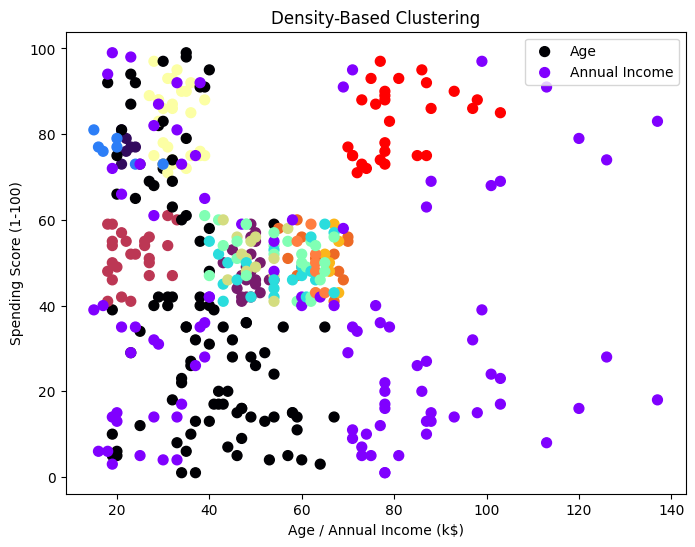

     CustomerID  Cluster
0             1       -1
1             2        0
2             3       -1
3             4        0
4             5       -1
..          ...      ...
195         196       -1
196         197       -1
197         198       -1
198         199       -1
199         200       -1

[200 rows x 2 columns]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select the relevant features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate the DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=5)  # You may need to adjust 'eps' and 'min_samples'

# Fit the model and get cluster assignments
data['Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for 'Age'
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='inferno', s=50, label='Age')

# Scatter plot for 'Annual Income'
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow', s=50, label='Annual Income')

plt.title('Density-Based Clustering')
plt.xlabel('Age / Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()  # Show the legend to distinguish between 'Age' and 'Annual Income'
plt.show()

# Display the resulting cluster assignments
print(data[['CustomerID', 'Cluster']])

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")